<a href="https://colab.research.google.com/github/zak1010y/Attacks-Detection-with-Machine-Learning/blob/main/DS_Attacks_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setting up the dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data processing
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Over sampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

# For evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS/CSV files/WSNBFSFdataset_DSprog.csv")
df.head(60)

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
0,1,0.100000,79,79,600.000000,5.0,0.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,No attack,normal
1,2,0.100963,78,78,599.979723,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,No attack,normal
2,2,0.100963,76,76,599.979722,5.0,800.0,79.255,1.255,NaN,30,1,1,100.0,0.0,79,4,No attack,normal
3,2,0.100964,75,75,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,No attack,normal
4,2,0.100964,118,118,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,No attack,normal
5,2,0.100964,117,117,599.979722,5.0,800.0,79.255,NaN,48.0,30,1,1,100.0,0.0,79,4,No attack,normal
6,2,NaN,116,116,599.979722,5.0,800.0,79.255,NaN,48.0,30,1,1,100.0,0.0,79,4,No attack,normal
7,2,NaN,74,74,NaN,NaN,800.0,79.255,1.255,48.0,30,1,1,NaN,0.0,79,4,Under attack,Blackhole
8,2,NaN,77,77,599.979723,5.0,NaN,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,No attack,normal
9,2,NaN,39,39,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,No attack,normal


In [ ]:
df.corr()

<ipython-input-207-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num
Event,1.000000,-0.025164,-0.003659,-0.003659,0.024948,NaN,0.014761,-0.004034,NaN,0.765613,-0.005996,0.005820,-0.019701,-0.017954,0.004096,-0.025867,-0.019701
Time,-0.025164,1.000000,-0.031420,-0.031420,-0.998660,NaN,0.001244,-0.034536,NaN,-0.020061,0.096785,-0.071284,0.633117,-0.013041,-0.208239,0.247709,0.633117
S_Node,-0.003659,-0.031420,1.000000,1.000000,0.052847,NaN,0.003128,0.867793,NaN,-0.002570,-0.010985,0.056675,-0.004429,0.002214,-0.001458,0.020096,-0.004429
Node_id,-0.003659,-0.031420,1.000000,1.000000,0.052847,NaN,0.003128,0.867793,NaN,-0.002570,-0.010985,0.056675,-0.004429,0.002214,-0.001458,0.020096,-0.004429
Rest_Energy,0.024948,-0.998660,0.052847,0.052847,1.000000,NaN,-0.001362,0.053065,NaN,0.020158,-0.098650,0.088105,-0.631824,0.009154,0.201983,-0.249878,-0.631824
Trace_Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mac_Type_Pckt,0.014761,0.001244,0.003128,0.003128,-0.001362,NaN,1.000000,0.003185,NaN,0.004122,-0.010215,0.016706,0.002547,0.007884,-0.002609,0.004535,0.002547
Source_IP_Port,-0.004034,-0.034536,0.867793,0.867793,0.053065,NaN,0.003185,1.000000,NaN,-0.002361,-0.010838,0.050432,-0.005476,0.000772,0.000388,0.020466,-0.005476
Des_IP_Port,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packet_Size,0.765613,-0.020061,-0.002570,-0.002570,0.020158,NaN,0.004122,-0.002361,NaN,1.000000,0.001234,0.007982,-0.016478,-0.018465,0.000188,-0.024480,-0.016478


##Encoding the catigorical features

In [ ]:
le = preprocessing.LabelEncoder()
Ohe = preprocessing.OneHotEncoder()

In [ ]:
cat=df.select_dtypes("object").columns
print(cat)

Index(['behaviour', 'Type'], dtype='object')


In [ ]:
#cat=cat
#for x in cat:
#  df[x]=le.fit_transform(df[x])


In [ ]:
df['behaviour']=le.fit_transform(df['behaviour'])

#type_column_2d = df[['Type']]

# Apply OneHotEncoder to the reshaped 'Type' column and create a new DataFrame for the encoded values
#type_encoded = Ohe.fit_transform(type_column_2d)

# Convert the encoded values back to a dense array and create new columns with appropriate names
#type_encoded_array = type_encoded.toarray()
#type_encoded_columns = Ohe.get_feature_names_out(['Type'])
#df_encoded = pd.DataFrame(type_encoded_array, columns=type_encoded_columns, index=df.index)

# Now you can concatenate the original DataFrame and the encoded DataFrame
#df_final = pd.concat([df, df_encoded], axis=1)

# You can drop the original 'Type' column if needed
#df_final.drop(columns=['Type'], inplace=True)

In [ ]:
df['Type']=le.fit_transform(df['Type'])
# will use one hot encoding because the values arent ordinal
#Type_encoded = pd.get_dummies(df["Type"], prefix="Type")

#df_final = df.copy()
# Concatenate the encoded columns back to the original DataFrame
#df_final = pd.concat([df, Type_encoded], axis=1)

# Drop the original "Summary" column since it's no longer needed
#df_final.drop("Type", axis=1, inplace=True)

In [ ]:
df.head()

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
0,1,0.100000,79,79,600.000000,5.0,0.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
1,2,0.100963,78,78,599.979723,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
2,2,0.100963,76,76,599.979722,5.0,800.0,79.255,1.255,NaN,30,1,1,100.0,0.0,79,4,0,3
3,2,0.100964,75,75,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
4,2,0.100964,118,118,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3


In [ ]:
df.corr()

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
Event,1.000000,-0.025164,-0.003659,-0.003659,0.024948,NaN,0.014761,-0.004034,NaN,0.765613,-0.005996,0.005820,-0.019701,-0.017954,0.004096,-0.025867,-0.019701,0.022555,-0.029305
Time,-0.025164,1.000000,-0.031420,-0.031420,-0.998660,NaN,0.001244,-0.034536,NaN,-0.020061,0.096785,-0.071284,0.633117,-0.013041,-0.208239,0.247709,0.633117,0.330483,-0.297662
S_Node,-0.003659,-0.031420,1.000000,1.000000,0.052847,NaN,0.003128,0.867793,NaN,-0.002570,-0.010985,0.056675,-0.004429,0.002214,-0.001458,0.020096,-0.004429,-0.072376,0.074936
Node_id,-0.003659,-0.031420,1.000000,1.000000,0.052847,NaN,0.003128,0.867793,NaN,-0.002570,-0.010985,0.056675,-0.004429,0.002214,-0.001458,0.020096,-0.004429,-0.072376,0.074936
Rest_Energy,0.024948,-0.998660,0.052847,0.052847,1.000000,NaN,-0.001362,0.053065,NaN,0.020158,-0.098650,0.088105,-0.631824,0.009154,0.201983,-0.249878,-0.631824,-0.330712,0.295122
Trace_Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mac_Type_Pckt,0.014761,0.001244,0.003128,0.003128,-0.001362,NaN,1.000000,0.003185,NaN,0.004122,-0.010215,0.016706,0.002547,0.007884,-0.002609,0.004535,0.002547,-0.001579,0.001317
Source_IP_Port,-0.004034,-0.034536,0.867793,0.867793,0.053065,NaN,0.003185,1.000000,NaN,-0.002361,-0.010838,0.050432,-0.005476,0.000772,0.000388,0.020466,-0.005476,-0.069259,0.071573
Des_IP_Port,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Packet_Size,0.765613,-0.020061,-0.002570,-0.002570,0.020158,NaN,0.004122,-0.002361,NaN,1.000000,0.001234,0.007982,-0.016478,-0.018465,0.000188,-0.024480,-0.016478,0.012710,-0.018056


In [ ]:
df.head(60)

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
0,1,0.100000,79,79,600.000000,5.0,0.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
1,2,0.100963,78,78,599.979723,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
2,2,0.100963,76,76,599.979722,5.0,800.0,79.255,1.255,NaN,30,1,1,100.0,0.0,79,4,0,3
3,2,0.100964,75,75,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
4,2,0.100964,118,118,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
5,2,0.100964,117,117,599.979722,5.0,800.0,79.255,NaN,48.0,30,1,1,100.0,0.0,79,4,0,3
6,2,NaN,116,116,599.979722,5.0,800.0,79.255,NaN,48.0,30,1,1,100.0,0.0,79,4,0,3
7,2,NaN,74,74,NaN,NaN,800.0,79.255,1.255,48.0,30,1,1,NaN,0.0,79,4,1,0
8,2,NaN,77,77,599.979723,5.0,NaN,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
9,2,NaN,39,39,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3


##Working with the Null  values

In [ ]:
df.isnull().sum()

Event                0
Time              1698
S_Node               0
Node_id              0
Rest_Energy       1710
Trace_Level       3898
Mac_Type_Pckt     1778
Source_IP_Port       0
Des_IP_Port         60
Packet_Size        939
TTL                  0
Hop_Count            0
Broadcast_ID         0
Dest_Node_Num      419
Dest_Seq_Num      1235
Src_Node_ID          0
Src_Seq_Num          0
behaviour            0
Type                 0
dtype: int64

In [ ]:
df['Dest_Node_Num'].value_counts()

100.0    9361
130.0    7062
121.0    4618
166.0    4442
172.0    3689
36.0     3577
178.0    3573
196.0    3570
184.0    3553
199.0    3537
37.0     2599
Name: Dest_Node_Num, dtype: int64

In [ ]:
df['Dest_Seq_Num'].value_counts()

0.0    40762
5.0     4537
6.0     3442
7.0       24
Name: Dest_Seq_Num, dtype: int64

In [ ]:
df.duplicated().value_counts()

False    49785
True       215
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.duplicated().value_counts()

False    49785
dtype: int64

In [ ]:
df['Mac_Type_Pckt'].value_counts()

800.0    48003
0.0          4
Name: Mac_Type_Pckt, dtype: int64

In [ ]:
df['Trace_Level'].value_counts()

5.0    45898
Name: Trace_Level, dtype: int64

In [ ]:
df['Des_IP_Port'].value_counts()

1.255    49725
Name: Des_IP_Port, dtype: int64

In [ ]:
df = df.drop(['Trace_Level', 'Des_IP_Port', 'Mac_Type_Pckt'], axis=1)
df.head()

,Event,Time,S_Node,Node_id,Rest_Energy,Source_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
0,1,0.100000,79,79,600.000000,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3
1,2,0.100963,78,78,599.979723,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3
2,2,0.100963,76,76,599.979722,79.255,NaN,30,1,1,100.0,0.0,79,4,0,3
3,2,0.100964,75,75,599.979722,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3
4,2,0.100964,118,118,599.979722,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3


In [ ]:
df.isnull().sum()

Event                0
Time              1483
S_Node               0
Node_id              0
Rest_Energy       1652
Source_IP_Port       0
Packet_Size        932
TTL                  0
Hop_Count            0
Broadcast_ID         0
Dest_Node_Num      419
Dest_Seq_Num      1235
Src_Node_ID          0
Src_Seq_Num          0
behaviour            0
Type                 0
dtype: int64

In [ ]:
df.corr()

,Event,Time,S_Node,Node_id,Rest_Energy,Source_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
Event,1.000000,-0.025164,-0.003817,-0.003817,0.025201,-0.004162,0.765512,-0.006005,0.006361,-0.019740,-0.017425,0.003871,-0.025567,-0.019740,0.022395,-0.029171
Time,-0.025164,1.000000,-0.031420,-0.031420,-0.998660,-0.034536,-0.020061,0.096785,-0.071284,0.633117,-0.013041,-0.208239,0.247709,0.633117,0.330483,-0.297662
S_Node,-0.003817,-0.031420,1.000000,1.000000,0.052782,0.867994,-0.002731,-0.010809,0.057589,-0.004532,0.002528,-0.001857,0.020635,-0.004532,-0.072206,0.074751
Node_id,-0.003817,-0.031420,1.000000,1.000000,0.052782,0.867994,-0.002731,-0.010809,0.057589,-0.004532,0.002528,-0.001857,0.020635,-0.004532,-0.072206,0.074751
Rest_Energy,0.025201,-0.998660,0.052782,0.052782,1.000000,0.052903,0.020508,-0.098512,0.088134,-0.631487,0.009771,0.202006,-0.248773,-0.631487,-0.331275,0.295505
Source_IP_Port,-0.004162,-0.034536,0.867994,0.867994,0.052903,1.000000,-0.002515,-0.010520,0.051014,-0.005623,0.000895,0.000017,0.020740,-0.005623,-0.069052,0.071316
Packet_Size,0.765512,-0.020061,-0.002731,-0.002731,0.020508,-0.002515,1.000000,0.001231,0.008786,-0.016527,-0.017689,-0.000141,-0.024042,-0.016527,0.012430,-0.017793
TTL,-0.006005,0.096785,-0.010809,-0.010809,-0.098512,-0.010520,0.001231,1.000000,-0.212734,0.031523,-0.001078,-0.532909,0.085160,0.031523,0.172678,-0.150753
Hop_Count,0.006361,-0.071284,0.057589,0.057589,0.088134,0.051014,0.008786,-0.212734,1.000000,0.138408,0.211046,-0.273988,0.207440,0.138408,-0.179365,0.134799
Broadcast_ID,-0.019740,0.633117,-0.004532,-0.004532,-0.631487,-0.005623,-0.016527,0.031523,0.138408,1.000000,0.418328,-0.268914,0.614957,1.000000,-0.229317,0.212554


In [ ]:
df.head(20)

,Event,Time,S_Node,Node_id,Rest_Energy,Source_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
0,1,0.100000,79,79,600.000000,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3
1,2,0.100963,78,78,599.979723,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3
2,2,0.100963,76,76,599.979722,79.255,NaN,30,1,1,100.0,0.0,79,4,0,3
3,2,0.100964,75,75,599.979722,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3
4,2,0.100964,118,118,599.979722,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3
5,2,0.100964,117,117,599.979722,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3
6,2,NaN,116,116,599.979722,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3
7,2,NaN,74,74,NaN,79.255,48.0,30,1,1,NaN,0.0,79,4,1,0
8,2,NaN,77,77,599.979723,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3
9,2,NaN,39,39,599.979722,79.255,48.0,30,1,1,100.0,0.0,79,4,0,3


In [ ]:
df = df.drop(['Node_id'], axis=1)

In [ ]:
df[['Rest_Energy']] = df[['Rest_Energy']].interpolate(method='linear')

In [ ]:
df[['Packet_Size']] = df[['Packet_Size']].fillna(df['Packet_Size'].value_counts().index[0])

In [ ]:
df[['Time','Dest_Seq_Num', 'Dest_Node_Num']] = df[['Time','Dest_Seq_Num', 'Dest_Node_Num']].fillna(method='pad')

In [ ]:
df.isnull().sum()

Event             0
Time              0
S_Node            0
Rest_Energy       0
Source_IP_Port    0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
behaviour         0
Type              0
dtype: int64

In [ ]:
df.corr()

,Event,Time,S_Node,Rest_Energy,Source_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
Event,1.000000,-0.023956,-0.003817,0.023563,-0.004162,0.753475,-0.006005,0.006361,-0.019740,-0.016810,-0.001142,-0.025567,-0.019740,0.022395,-0.029171
Time,-0.023956,1.000000,-0.030678,-0.998674,-0.032838,-0.011440,0.100519,-0.072145,0.633753,-0.011247,-0.221815,0.250758,0.633753,0.329457,-0.297057
S_Node,-0.003817,-0.030678,1.000000,0.050098,0.867994,-0.001905,-0.010809,0.057589,-0.004532,0.002551,0.006283,0.020635,-0.004532,-0.072206,0.074751
Rest_Energy,0.023563,-0.998674,0.050098,1.000000,0.050158,0.011148,-0.098500,0.084476,-0.631763,0.011877,0.216948,-0.247401,-0.631763,-0.331759,0.295772
Source_IP_Port,-0.004162,-0.032838,0.867994,0.050158,1.000000,-0.001552,-0.010520,0.051014,-0.005623,0.000993,0.010084,0.020740,-0.005623,-0.069052,0.071316
Packet_Size,0.753475,-0.011440,-0.001905,0.011148,-0.001552,1.000000,-0.001735,0.009269,-0.011921,-0.016619,-0.002572,-0.020250,-0.011921,0.014329,-0.019274
TTL,-0.006005,0.100519,-0.010809,-0.098500,-0.010520,-0.001735,1.000000,-0.212734,0.031523,-0.003577,-0.499146,0.085160,0.031523,0.172678,-0.150753
Hop_Count,0.006361,-0.072145,0.057589,0.084476,0.051014,0.009269,-0.212734,1.000000,0.138408,0.210834,-0.285269,0.207440,0.138408,-0.179365,0.134799
Broadcast_ID,-0.019740,0.633753,-0.004532,-0.631763,-0.005623,-0.011921,0.031523,0.138408,1.000000,0.414483,-0.276239,0.614957,1.000000,-0.229317,0.212554
Dest_Node_Num,-0.016810,-0.011247,0.002551,0.011877,0.000993,-0.016619,-0.003577,0.210834,0.414483,1.000000,-0.198247,0.804258,0.414483,-0.603148,0.558701


##Visualizations

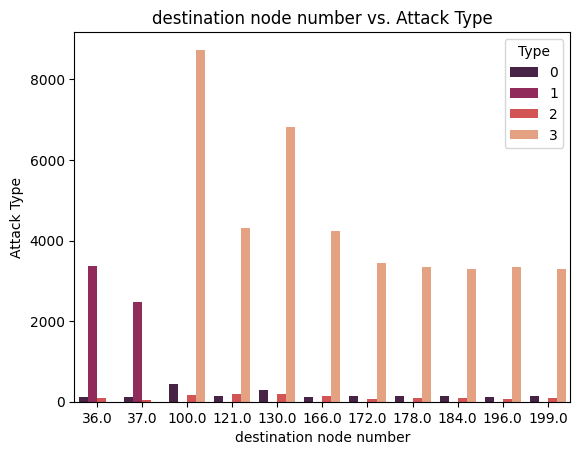

In [ ]:
sns.countplot(data=df, x='Dest_Node_Num', hue='Type', palette='rocket')
plt.xlabel('destination node number')
plt.ylabel('Attack Type')
plt.title('destination node number vs. Attack Type')
plt.show()

sns.countplot(df, x='Event', palette='crest')
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('How many each event was mentioned')
plt.show()

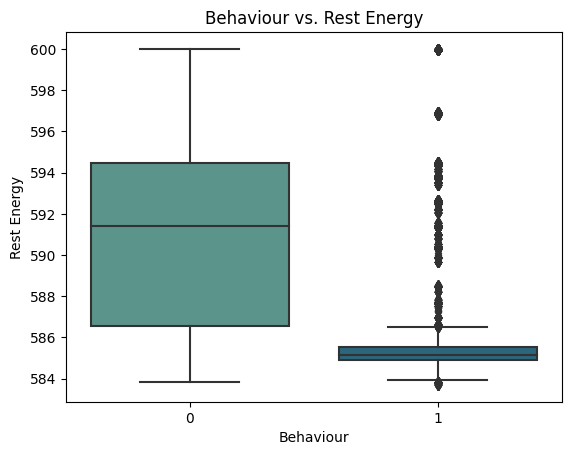

In [ ]:
sns.boxplot(data=df, x='behaviour', y='Rest_Energy', palette='crest')
plt.xlabel('Behaviour')
plt.ylabel('Rest Energy')
plt.title('Behaviour vs. Rest Energy')
plt.show()

In [ ]:
# sns.lineplot(data=df, x='Time', y='Packet_Size')
# sns.lineplot(data=df, x='Time', y='Rest_Energy')

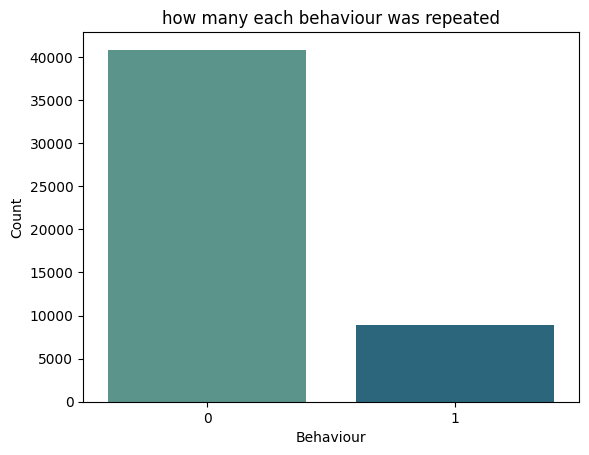

In [ ]:
sns.countplot(df, x='behaviour', palette='crest')
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.title('how many each behaviour was repeated')
plt.show()

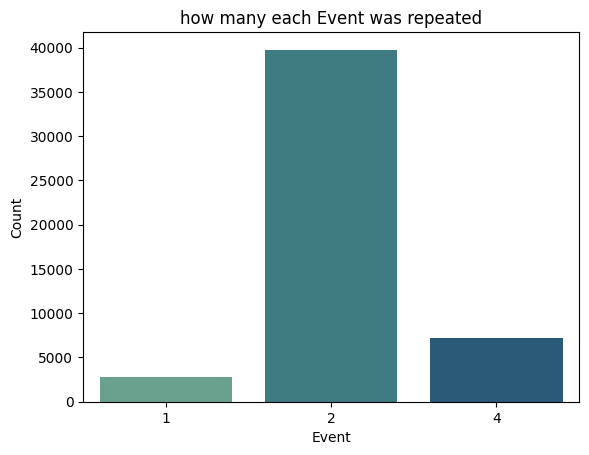

In [ ]:
sns.countplot(df, x='Event', palette='crest')
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('how many each Event was repeated')
plt.show()

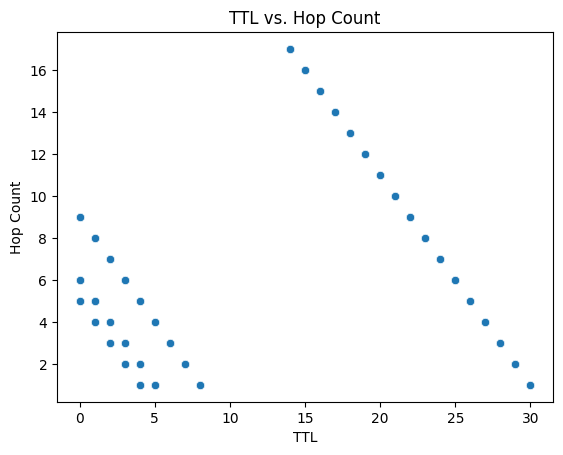

In [ ]:
# sns.scatterplot(data=df, x='Packet_Size', y='Hop_Count')
sns.scatterplot(data=df, x='TTL', y='Hop_Count')
plt.xlabel('TTL')
plt.ylabel('Hop Count')
plt.title('TTL vs. Hop Count')
plt.show()

In [ ]:
# droping this column because keeping it will give the model the right value to predict
df = df.drop(['Type'], axis=1)

##Spletting the data

In [ ]:
X = df.drop(['behaviour'], axis=1)

y = df['behaviour']

In [ ]:
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
RFC = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
dt_acc_et = np.array([])
dt_rec_et = np.array([])
dt_pre_et = np.array([])
dt_f1_et = np.array([])

knn_acc_et = np.array([])
knn_rec_et = np.array([])
knn_pre_et = np.array([])
knn_f1_et = np.array([])

rfc_acc_et = np.array([])
rfc_rec_et = np.array([])
rfc_pre_et = np.array([])
rfc_f1_et = np.array([])

In [ ]:
from sklearn.metrics import f1_score

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
  # Decision Tree
  dtc.fit(X_train, y_train)
  y_pred_dt = dtc.predict(X_test)
  dt_acc_et = np.append(dt_acc_et, float(accuracy_score( y_test,y_pred_dt)))
  dt_pre_et = np.append(dt_pre_et, float(precision_score(y_test, y_pred_dt)))
  dt_rec_et = np.append(dt_rec_et, float(recall_score(y_test, y_pred_dt)))
  dt_f1_et = np.append(dt_f1_et, float(f1_score(y_test, y_pred_dt)))

  # KNN
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)
  knn_acc_et = np.append(knn_acc_et, float(accuracy_score( y_test,y_pred_knn)))
  knn_pre_et = np.append(knn_pre_et, float(precision_score(y_test, y_pred_knn)))
  knn_rec_et = np.append(knn_rec_et, float(recall_score(y_test, y_pred_knn)))
  knn_f1_et = np.append(knn_f1_et, float(f1_score(y_test, y_pred_knn)))

  # Random Forest
  RFC.fit(X_train, y_train)
  y_pred_RFC = RFC.predict(X_test)
  rfc_acc_et = np.append(rfc_acc_et, float(accuracy_score( y_test,y_pred_RFC)))
  rfc_pre_et = np.append(rfc_pre_et, float(precision_score(y_test, y_pred_RFC)))
  rfc_rec_et = np.append(rfc_rec_et, float(recall_score(y_test, y_pred_RFC)))
  rfc_f1_et = np.append(rfc_f1_et, float(f1_score(y_test, y_pred_RFC)))

#new_array = original_array.astype(new_data_type)

In [ ]:
dt_acc_et = dt_acc_et.astype(np.float64)
dt_pre_et = dt_pre_et.astype(np.float64)
dt_rec_et = dt_rec_et.astype(np.float64)
dt_f1_et = dt_f1_et.astype(np.float64)

knn_acc_et = knn_acc_et.astype(np.float64)
knn_pre_et = knn_pre_et.astype(np.float64)
knn_rec_et = knn_rec_et.astype(np.float64)
knn_f1_et = knn_f1_et.astype(np.float64)

rfc_acc_et = rfc_acc_et.astype(np.float64)
rfc_pre_et = rfc_pre_et.astype(np.float64)
rfc_f1_et = rfc_f1_et.astype(np.float64)

In [ ]:
knn_acc_et.shape

(10,)

In [ ]:
print(f"dt_acc_et: {dt_acc_et}")
print(f"dt_pre_et: {dt_pre_et}")
print(f"df_rec_et: {dt_rec_et}")
print(f"df_f1_et: {dt_f1_et}")

print(f"knn_acc_et: {knn_acc_et}")
print(f"knn_pre_et: {knn_pre_et}")
print(f"knn_rec_et: {knn_rec_et}")
print(f"knn_f1_et: {knn_f1_et}")
print("==============================")
print(f"rfc_acc_et: {rfc_acc_et}")
print(f"rfc_pre_et: {rfc_pre_et}")
print(f"rfc_rec_et: {rfc_rec_et}")
print(f"rfc_f1_et: {rfc_f1_et}")

dt_acc_et: [1.         1.         1.         1.         1.         0.99979916
 0.99979916 0.99979916 1.         0.99979916]
dt_pre_et: [1.         1.         1.         1.         1.         1.
 0.99890591 0.99886105 1.         0.99888018]
df_rec_et: [1.         1.         1.         1.         1.         0.99886105
 1.         1.         1.         1.        ]
df_f1_et: [1.         1.         1.         1.         1.         0.9994302
 0.99945265 0.9994302  1.         0.99943978]
knn_acc_et: [0.9594296  0.96103635 0.95501105 0.96103635 0.96003213 0.95842539
 0.95601526 0.96143804 0.96324563 0.96445069]
knn_pre_et: [0.9202381  0.9106933  0.90867052 0.90609756 0.92088999 0.90964591
 0.90919811 0.9202454  0.91767554 0.93544458]
knn_rec_et: [0.85132159 0.86786114 0.84425349 0.86395349 0.84659091 0.84851936
 0.84446878 0.85518814 0.86827033 0.86098655]
knn_f1_et: [0.88443936 0.88876147 0.8752784  0.88452381 0.8821788  0.87802004
 0.87563884 0.88652482 0.89228958 0.8966725 ]
rfc_acc_et: [0.

In [ ]:
all_acc_et = np.concatenate((dt_acc_et, knn_acc_et, rfc_acc_et))
all_pre_et = np.concatenate((dt_pre_et, knn_pre_et, rfc_pre_et))
all_rec_et = np.concatenate((dt_rec_et, knn_rec_et, rfc_rec_et))
all_f1_et = np.concatenate((dt_f1_et, knn_f1_et, rfc_f1_et))

In [ ]:
methods = ['Decision Tree'] * 10 + ['KNN'] * 10 + ['Random Forest'] * 10

In [ ]:
all_acc_df = pd.DataFrame({'methods': methods,
                    'Measurements': all_acc_et})

all_pre_df = pd.DataFrame({'methods': methods,
                    'Measurements': all_pre_et})

all_rec_df = pd.DataFrame({'methods': methods,
                    'Measurements': all_rec_et})

all_f1_df = pd.DataFrame({'methods': methods,
                    'Measurements': all_f1_et})

Text(0, 0.5, 'Acc')

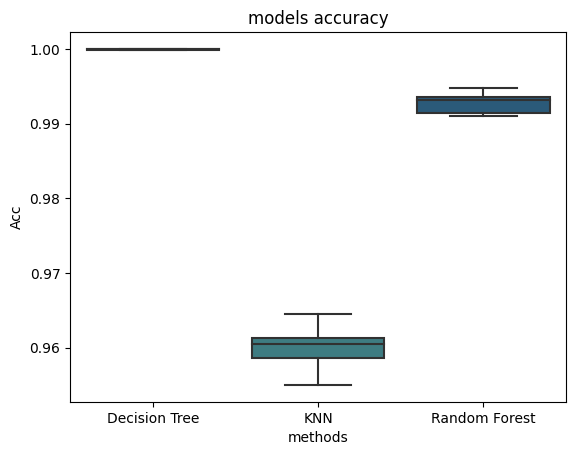

In [ ]:
sns.boxplot(data=all_acc_df, x='methods',y=all_acc_et, palette='crest')
plt.title('models accuracy')
plt.ylabel('Acc')

Text(0, 0.5, 'Pre')

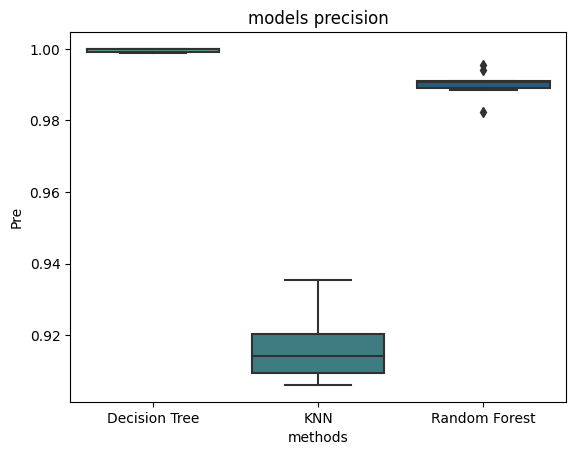

In [ ]:
sns.boxplot(data=all_pre_df, x='methods',y=all_pre_et, palette='crest')
plt.title('models precision')
plt.ylabel('Pre')

Text(0, 0.5, 'Rec')

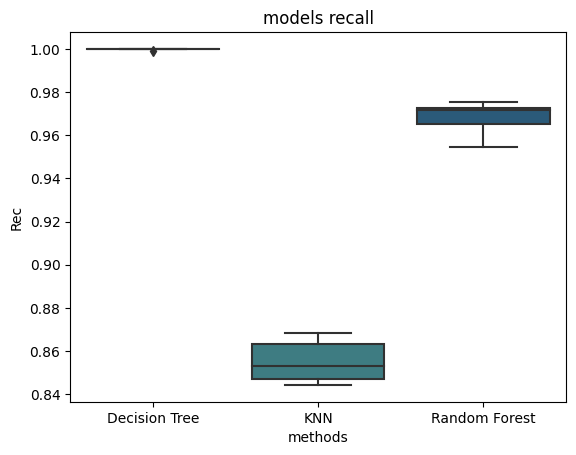

In [ ]:
sns.boxplot(data=all_rec_df, x='methods',y=all_rec_et, palette='crest')
plt.title('models recall')
plt.ylabel('Rec')

Text(0, 0.5, 'f1 score')

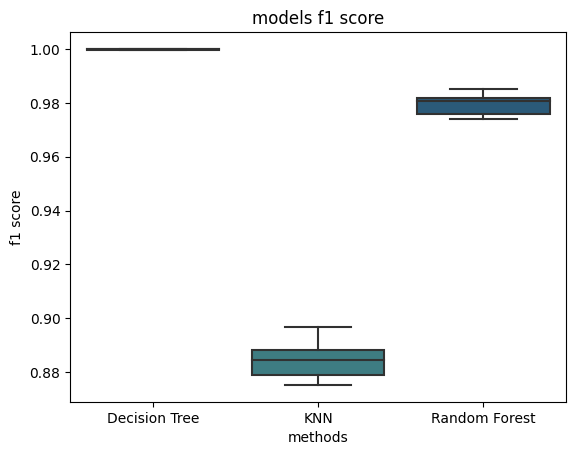

In [ ]:
sns.boxplot(data=all_f1_df, x='methods',y=all_f1_et, palette='crest')
plt.title('models f1 score')
plt.ylabel('f1 score')

In [ ]:
# Calculate the mean values
dt_acc_mean = np.mean(dt_acc_et)
dt_pre_mean = np.mean(dt_pre_et)
dt_rec_mean = np.mean(dt_rec_et)
dt_f1_mean = np.mean(dt_f1_et)

knn_acc_mean = np.mean(knn_acc_et)
knn_pre_mean = np.mean(knn_pre_et)
knn_rec_mean = np.mean(knn_rec_et)
knn_f1_mean = np.mean(knn_f1_et)

rfc_acc_mean = np.mean(rfc_acc_et)
rfc_pre_mean = np.mean(rfc_pre_et)
rfc_rec_mean = np.mean(rfc_rec_et)
rfc_f1_mean = np.mean(rfc_f1_et)

print("Decision Tree Mean Accuracy:", dt_acc_mean)
print("Decision Tree Mean Precision:", dt_pre_mean)
print("Decision Tree Mean Recall:", dt_rec_mean)
print("Decision Tree Mean F1 score:", dt_f1_mean)
print("============================================")
print("KNN Mean Accuracy:", knn_acc_mean)
print("KNN Mean Precision:", knn_pre_mean)
print("KNN Mean Recall:", knn_rec_mean)
print("KNN Mean F1 score:", knn_f1_mean)
print("============================================")
print("Random Forest Mean Accuracy:", rfc_acc_mean)
print("Random Forest Mean Precision:", rfc_pre_mean)
print("Random Forest Mean Recall:", rfc_rec_mean)
print("Random Forest Mean F1 score:", rfc_f1_mean)

Decision Tree Mean Accuracy: 0.999919662582848
Decision Tree Mean Precision: 0.9996647135103602
Decision Tree Mean Recall: 0.9998861047835991
Decision Tree Mean F1 score: 0.9997752829395832
KNN Mean Accuracy: 0.9600120506125729
KNN Mean Precision: 0.9158799012283037
KNN Mean Recall: 0.8551413783532139
KNN Mean F1 score: 0.8844327623248273
Random Forest Mean Accuracy: 0.9926692106848766
Random Forest Mean Precision: 0.9902258296625298
Random Forest Mean Recall: 0.9685316461795607
Random Forest Mean F1 score: 0.9792466177699837


## Models Measurements Visualizations

In [ ]:
compare_methods = pd.DataFrame({'methods': ['decision Tree', 'KNNR', 'Random Forest', 'decision Tree', 'KNNR', 'Random Forest','decision Tree', 'KNNR', 'Random Forest','decision Tree', 'KNNR', 'Random Forest'],
                    'Measurements': [dt_acc_mean, knn_acc_mean, rfc_acc_mean,  dt_pre_mean, knn_pre_mean, rfc_pre_mean, dt_rec_mean, knn_rec_mean, rfc_rec_mean, dt_f1_mean, knn_f1_mean, rfc_f1_mean],
                    'Measurements Name': ['accuracy', 'accuracy', 'accuracy', 'Precision', 'Precision', 'Precision', 'recall', 'recall', 'recall', 'f1', 'f1', 'f1']})

compare_methods

,methods,Measurements,Measurements Name
0,decision Tree,0.999920,accuracy
1,KNNR,0.960012,accuracy
2,Random Forest,0.992669,accuracy
3,decision Tree,0.999665,Precision
4,KNNR,0.915880,Precision
5,Random Forest,0.990226,Precision
6,decision Tree,0.999886,recall
7,KNNR,0.855141,recall
8,Random Forest,0.968532,recall
9,decision Tree,0.999775,f1


In [ ]:
compare_methods[['Measurements']] = compare_methods[['Measurements']].astype('float')

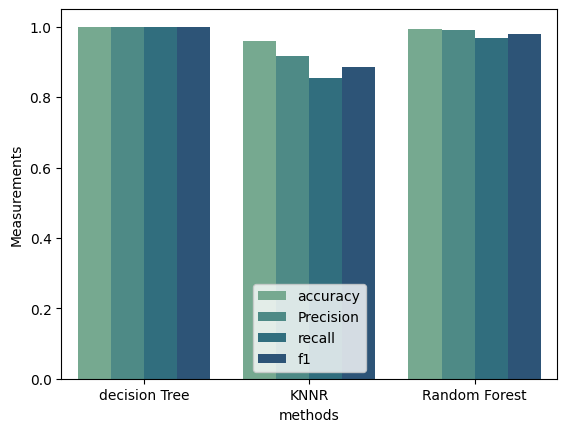

In [ ]:
sns.barplot(x='methods', y='Measurements', hue='Measurements Name' , data=compare_methods, palette='crest')
plt.legend(loc='lower center')

In [ ]:
import plotly.graph_objects as go

categories = ['accuracy', 'precision', 'recall', 'f1 Score']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[dt_acc_mean, dt_pre_mean, dt_rec_mean, dt_f1_mean],
      theta=categories,
      fill='toself',
      name='Model DT'
))
fig.add_trace(go.Scatterpolar(
      r=[knn_acc_mean, knn_pre_mean, knn_rec_mean, knn_f1_mean],
      theta=categories,
      fill='toself',
      name='Model Knn'
))
fig.add_trace(go.Scatterpolar(
      r=[rfc_acc_mean, rfc_pre_mean, rfc_rec_mean, rfc_f1_mean],
      theta=categories,
      fill='toself',
      name='Model RF'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True,  # Add a legend
  legend=dict(title='Models', orientation='h', x=0.5, y=1.1)  # Customize the legend position and title
)

fig.show()